# Problem Statement

The aim of this EDA is to help an online lending company analyse risk associated with a loan application. When a lending company receives an application, the borrower is approver or rejected based on his profile. This EDA will help to identify factors which classify a borrower to high-risk or low-risk customer. There are two types of risk associated with lending use-case:

* if customer is approved and doesn't repay the loan ,i.e borrower is a defaulter then the company faces a financial loss
* If customer is rejected but is likely to repay the loan, then not approving can lead to business loss


With the help of dataset the task is to identify variables or factors that determine of the borrower is likely to be a defaulter or not. The dataset consists of past loan approved loan applications and the corresponding loan status. The loan status "Charged Off" here refers to defaulted loan.


## Data Handling and Cleaning

### Reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan.csv")
df.head()

C:\Users\Rakshu\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Undertstanding the datatypes of the columns

To do any further analysis it is important to understand the data type of each column

In [3]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Handling Null values

Many columns in the dataset have null values. If the column has all null values then we can drop the column. The below code helps to identify null values and drop columns which have all null values


In [4]:
df.columns[df.isnull().sum()/df.shape[0] >0]
df.drop(labels=df.columns[df.isnull().sum()/df.shape[0]==1],axis=1,inplace=True)
df.shape

(39717, 57)

Other columns containing null values which are not necessary for the analysis can be dropped.

In [5]:
##dropping unncessary columns which contain null values

df.drop(labels=['emp_title', 'desc', 'title','last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med'],axis=1,inplace=True)

Columns with more than 50% null values can also be dropped

In [6]:
df.isnull().sum()/df.shape[0]
##remove columns with more than 50% null values

df.drop(labels=['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

Columns with lesser percentage of null values can be filled with 0

In [7]:

df['revol_util'].fillna(value='0%',inplace=True)

df['tax_liens'].fillna(value=0.0,inplace=True)

df['chargeoff_within_12_mths'].fillna(value=0.0,inplace=True)


In [8]:
## check the columns after cleaning
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

### Removing unnecessary columns
Columns which are not required for the analysis can be dropped

In [9]:
df.drop(labels=['id','member_id','url','zip_code','addr_state','earliest_cr_line','last_pymnt_amnt','issue_d','pymnt_plan'],axis=1,inplace=True)
df.shape

(39717, 39)

In [10]:
#check the datatype of columns after cleaning
df.dtypes

loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv             float64
term                         object
int_rate                     object
installment                 float64
grade                        object
sub_grade                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
loan_status                  object
purpose                      object
dti                         float64
delinq_2yrs                   int64
inq_last_6mths                int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                   object
total_acc                     int64
initial_list_status          object
out_prncp                   float64
out_prncp_inv               float64
total_pymnt                 float64
total_pymnt_inv             float64
total_rec_prncp             

### Standardizing data types

Term and interest rate can be converted to int and float


In [11]:
df['term']=df['term'].apply(lambda x: int(x.split(' ')[1]))
df['int_rate']=df['int_rate'].apply(lambda x: float(x[:-1]))


### Handling Outliers
Annual income seems to have a lot of outliers which can affect the analysis. The box plot below shows the outliers



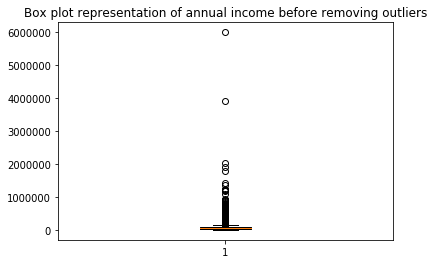

In [39]:
plt.boxplot(df['annual_inc'])
plt.title("Box plot representation of annual income before removing outliers")
plt.show()

In [13]:
## removing values beyond 99 percentile
df1=df[df['annual_inc']<=np.percentile(df['annual_inc'],99)]

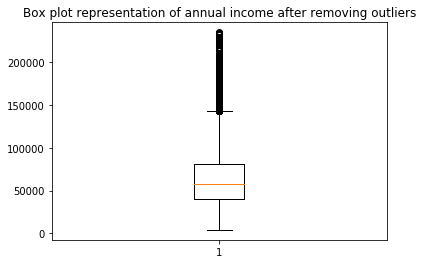

In [40]:
#after removing outliers
plt.boxplot(df1['annual_inc'])
plt.title("Box plot representation of annual income after removing outliers")

plt.show()

## Univariate Analysis

### Analysis of Un-ordered categorical data

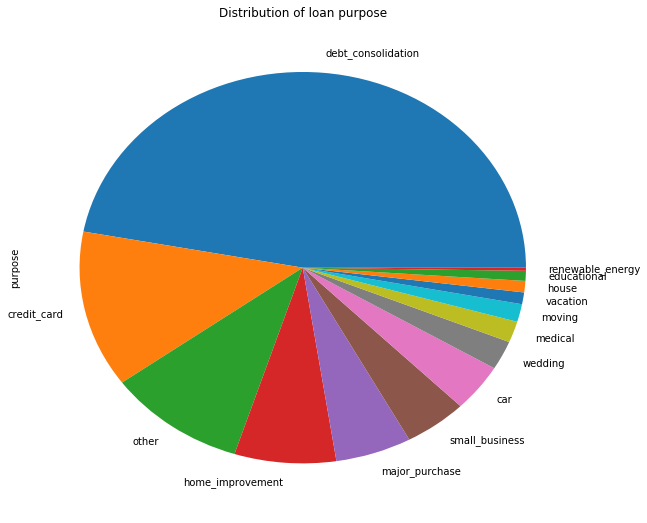

In [15]:
# distribution of loan purpose across the dataset
plt.figure(figsize=(10,9))
df1['purpose'].value_counts().plot.pie()
plt.title("Distribution of loan purpose")
plt.show()

## Conclusion

## Most of the borrowers in the dataset have taken the loan for debt consolidation

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


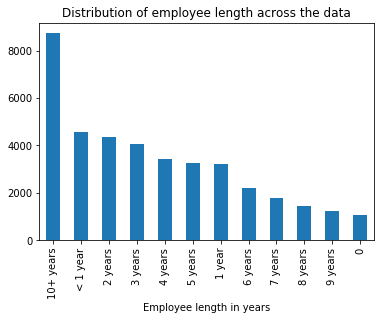

In [16]:
## cleaning emp_length

df1['emp_length']=df1['emp_length'].apply(lambda x: "0" if x=='n/a' else x)
df1['emp_length'].value_counts()

## distribution of employee length 

df1['emp_length'].value_counts().plot.bar()
plt.title("Distribution of employee length across the data")
plt.xlabel("Employee length in years")
plt.show()

##Conclusion

## Borrowers with more than 10 years experience have taken the most loans


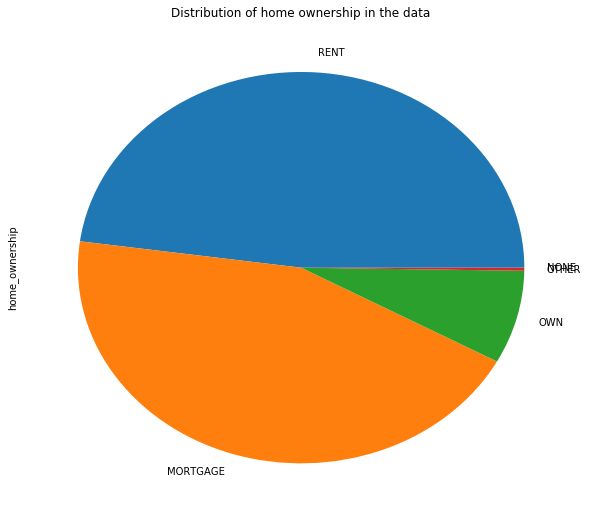

In [17]:
## distribution of home ownership across the data
plt.figure(figsize=(10,9))
df1['home_ownership'].value_counts().plot.pie()
plt.title("Distribution of home ownership in the data")
plt.show()

##Conclusion

## Few customers who have own home apply for the loan. Most of the borrowers have rented homes


### Analysis of Ordered Categorical Data

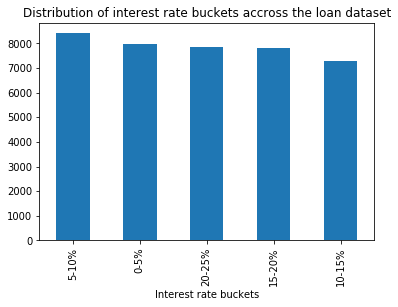

In [18]:
# Distribution of interest rate buckets accross the loan dataset
pd.qcut(x=df1['int_rate'],labels=['0-5%','5-10%','10-15%','15-20%','20-25%'],q=5).value_counts().plot.bar()
plt.title("Distribution of interest rate buckets accross the loan dataset")
plt.xlabel("Interest rate buckets")
plt.show()
#Conclusion
# Majority of the loans have an interest rate of 5-10%

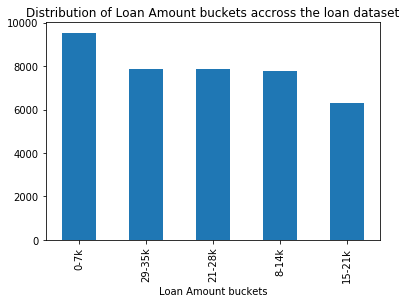

In [19]:
# Distribution of loan amount in buckets across the dataset

pd.qcut(x=df1['loan_amnt'],labels=['0-7k','8-14k','15-21k','21-28k','29-35k'],q=5).value_counts().plot.bar()
plt.title("Distribution of Loan Amount buckets accross the loan dataset")
plt.xlabel("Loan Amount buckets")
plt.show()
## 0-7k is the most requested loan amount, very few customers have requested for larger amount(29-35k)

## Segmented univariate analysis


In the segmented univariate analysis we will analysis the columns which affect loan status Charged off,i.e defaulted.

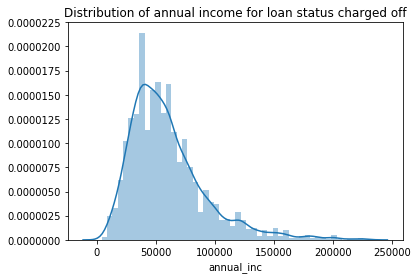

In [20]:
#Distribution of annual income for loan status charged off
sns.distplot(df1[df1['loan_status']=='Charged Off']['annual_inc'],bins=50)
plt.title("Distribution of annual income for loan status charged off")
plt.show()

## Conclusion
## Borrowers with lower annual income are more likely to charge off. From the graph we can see that as annual income increases the loans are less likely to be charged off
## To further analysis , we can plot the percentage of charged off loans for each annual income buckets.

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


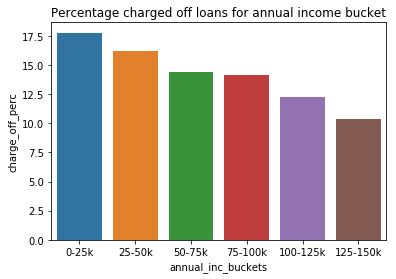

In [21]:
## Charged off proportion for each annual income range


df1['annual_inc_buckets']=pd.qcut(x=df1['annual_inc'],labels=['0-25k','25-50k','50-75k','75-100k','100-125k','125-150k'],q=6)

annual_inc_vs_loan_status = df1.groupby(by=['annual_inc_buckets','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
annual_inc_vs_loan_status['total']=annual_inc_vs_loan_status['Charged Off']+annual_inc_vs_loan_status['Current']+annual_inc_vs_loan_status['Fully Paid']
annual_inc_vs_loan_status['charge_off_perc']= (annual_inc_vs_loan_status['Charged Off']*100)/annual_inc_vs_loan_status['total']
plt.xlabel("Interest Rate in buckets")
sns.barplot(data=annual_inc_vs_loan_status,x='annual_inc_buckets',y='charge_off_perc')
plt.title("Percentage charged off loans for annual income bucket")
plt.show()

##Conclusion
##customers with lower annual income are more likely to be charged off

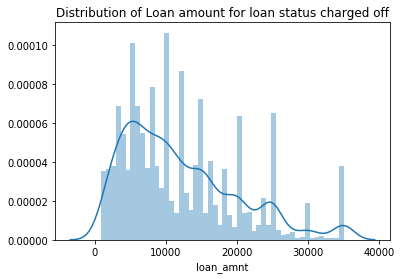

In [22]:
## Distribution of loan amount for charged off loans
sns.distplot(df1[df1['loan_status']=='Charged Off']['loan_amnt'],bins=50)
plt.title("Distribution of Loan amount for loan status charged off")
plt.show()

##Conclusion

## 5000-10000k bucket have more charge off loans


C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


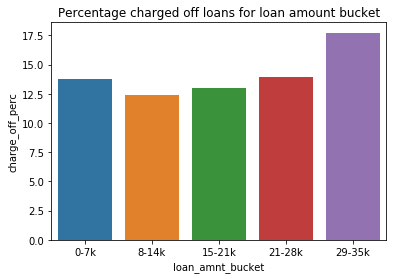

In [23]:

df1['loan_amnt_bucket']=pd.qcut(x=df1['loan_amnt'],labels=['0-7k','8-14k','15-21k','21-28k','29-35k'],q=5)

loan_amnt_vs_loan_status = df1.groupby(by=['loan_amnt_bucket','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
loan_amnt_vs_loan_status['total']=loan_amnt_vs_loan_status['Charged Off']+loan_amnt_vs_loan_status['Current']+loan_amnt_vs_loan_status['Fully Paid']
loan_amnt_vs_loan_status['charge_off_perc']= (loan_amnt_vs_loan_status['Charged Off']*100)/loan_amnt_vs_loan_status['total']
plt.xlabel("Interest Rate in buckets")
sns.barplot(data=loan_amnt_vs_loan_status,x='loan_amnt_bucket',y='charge_off_perc')
plt.title("Percentage charged off loans for loan amount bucket")
plt.show()

## Higher loan amount have more chances of being charged off


C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


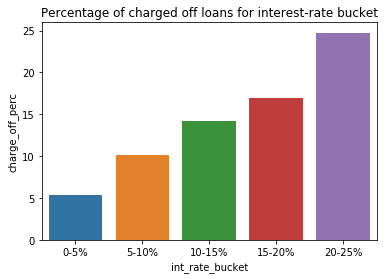

In [24]:
## Distribution of charged off loans for each interest rate bucket
df1['int_rate_bucket']=pd.qcut(x=df1['int_rate'],labels=['0-5%','5-10%','10-15%','15-20%','20-25%'],q=5)

interest_rate_vs_loan_status = df1.groupby(by=['int_rate_bucket','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
interest_rate_vs_loan_status['total']=interest_rate_vs_loan_status['Charged Off']+interest_rate_vs_loan_status['Current']+interest_rate_vs_loan_status['Fully Paid']
interest_rate_vs_loan_status['charge_off_perc']= (interest_rate_vs_loan_status['Charged Off']*100)/interest_rate_vs_loan_status['total']
plt.xlabel("Interest Rate in buckets")
sns.barplot(data=interest_rate_vs_loan_status,x='int_rate_bucket',y='charge_off_perc')
plt.title("Percentage of charged off loans for interest-rate bucket")
plt.show()

##Conclusion:
## customers with high interest rates are more likely to be charged off

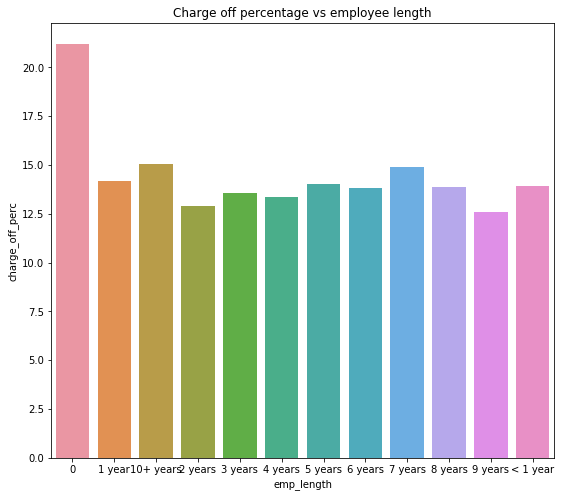

In [43]:
## employee length for charged off loans

employee_len_vs_loan_status=df1.groupby(by=['emp_length','loan_status'])['loan_status'].count().unstack().reset_index()
employee_len_vs_loan_status['Total']=employee_len_vs_loan_status['Charged Off']+ employee_len_vs_loan_status['Current']+ employee_len_vs_loan_status['Fully Paid']
employee_len_vs_loan_status['charge_off_perc']=(employee_len_vs_loan_status['Charged Off']*100)/employee_len_vs_loan_status['Total']

plt.figure(figsize=(9,8))
sns.barplot(data=employee_len_vs_loan_status,x='emp_length',y='charge_off_perc')
plt.title("Charge off percentage vs employee length")
plt.show()

## Conclusions
## customers with 0,<1year,1 year experience are more likely to be charged off

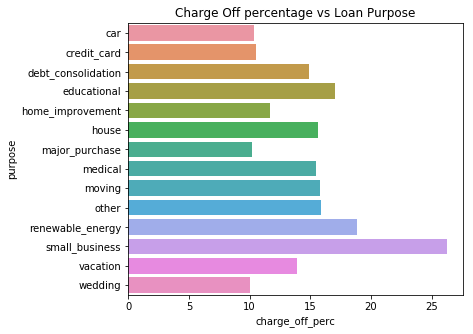

In [47]:
## Distribution of loan purpose for charged off loans

purpose_vs_loan_status=df1.groupby(by=['purpose','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
purpose_vs_loan_status['total']= purpose_vs_loan_status['Charged Off']+purpose_vs_loan_status['Current']+purpose_vs_loan_status['Fully Paid']
purpose_vs_loan_status['charge_off_perc']=(purpose_vs_loan_status['Charged Off']*100)/purpose_vs_loan_status['total']
plt.figure(figsize=(6,5))
sns.barplot(data=purpose_vs_loan_status,y='purpose',x='charge_off_perc')
plt.title("Charge Off percentage vs Loan Purpose")
plt.show()

##Conclusion

##  loans with purpose small business are more likely to be charged off

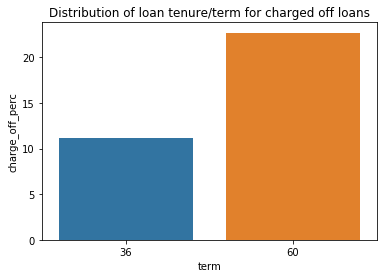

In [48]:
## Distribution of loan tenure/term for charged off loans

term_vs_loan_status = df1.groupby(by=['term','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
term_vs_loan_status['total']= term_vs_loan_status['Charged Off']+term_vs_loan_status['Fully Paid']+term_vs_loan_status['Current']
term_vs_loan_status['charge_off_perc']= (term_vs_loan_status['Charged Off']*100)/term_vs_loan_status['total']
sns.barplot(data=term_vs_loan_status,x='term',y='charge_off_perc')
plt.title("Distribution of loan tenure/term for charged off loans")
plt.show()

## Conclusion
## loans with more no of installments are more likely to default

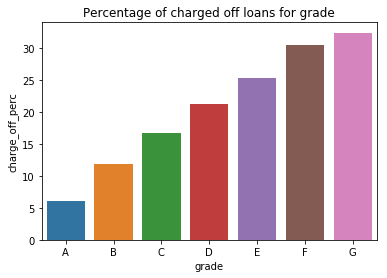

In [28]:
## Distribution of grade of loan for charged off loans
grade_vs_loan_status = df1.groupby(by=['grade','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
grade_vs_loan_status['total']=grade_vs_loan_status['Charged Off']+grade_vs_loan_status['Current']+grade_vs_loan_status['Fully Paid']
grade_vs_loan_status['charge_off_perc']= (grade_vs_loan_status['Charged Off']*100)/grade_vs_loan_status['total']
sns.barplot(data=grade_vs_loan_status,x='grade',y='charge_off_perc')
plt.title("Percentage of charged off loans for grade")
plt.show()

##Conclusion

## loans with grade G are more likely to be charged off

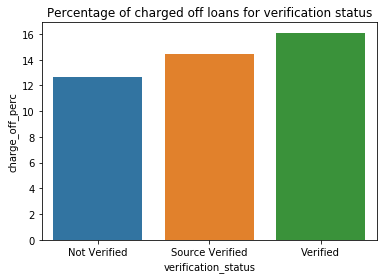

In [29]:
# Distribution of verification status for charged off loans

verification_status_vs_loan_status = df1.groupby(by=['verification_status','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
verification_status_vs_loan_status['total']=verification_status_vs_loan_status['Charged Off']+verification_status_vs_loan_status['Current']+verification_status_vs_loan_status['Fully Paid']
verification_status_vs_loan_status['charge_off_perc']= (verification_status_vs_loan_status['Charged Off']*100)/verification_status_vs_loan_status['total']
sns.barplot(data=verification_status_vs_loan_status,x='verification_status',y='charge_off_perc')
plt.title("Percentage of charged off loans for verification status")
plt.show()

##Conclusion

## customers who are not verified are more likely to be defaulted/charged off

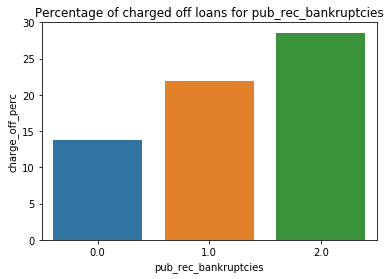

In [30]:
## public record bankruptcies for charged off loans
public_bankruptcies_vs_loan_status = df1.groupby(by=['pub_rec_bankruptcies','loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
public_bankruptcies_vs_loan_status['total']=public_bankruptcies_vs_loan_status['Charged Off']+public_bankruptcies_vs_loan_status['Current']+public_bankruptcies_vs_loan_status['Fully Paid']
public_bankruptcies_vs_loan_status['charge_off_perc']= (public_bankruptcies_vs_loan_status['Charged Off']*100)/public_bankruptcies_vs_loan_status['total']
sns.barplot(data=public_bankruptcies_vs_loan_status,x='pub_rec_bankruptcies',y='charge_off_perc')
plt.title("Percentage of charged off loans for pub_rec_bankruptcies")
plt.show()


## customers having more number of public record bankruptcies are more likely to default

## Bivariate analysis

In the bivariate analysis we can identify two variables which are strongly correlated to each other.

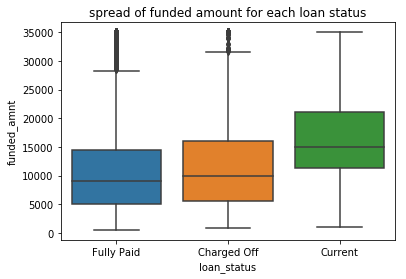

In [31]:
#spread of funded amount for each loan status

sns.boxplot(df1['loan_status'],df1['funded_amnt'])
plt.title("spread of funded amount for each loan status")
plt.show()

#Conclusion

## Loans which are still not closed/matured seem to have a higher funded amount. However there is not significant difference bwteen fully paid and charged off loans. But in the previous segmented uninvariate anaylyis we saw that higher loan amounts are more likely to be charged off 

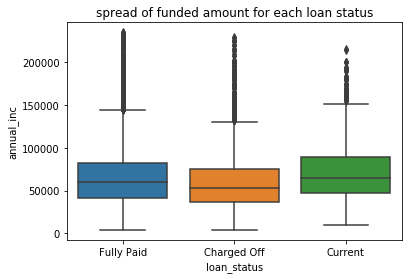

In [32]:
# spread of annual income for each loan status
sns.boxplot(df1['loan_status'],df1['annual_inc'])
plt.title("spread of funded amount for each loan status")

plt.show()

## Conclusion Current and Fully Paid loans have higher income compared to Charged off loans.
## Segmented analysis of annual income for charged off loans also showed that customers with low income are more likely to be charged off

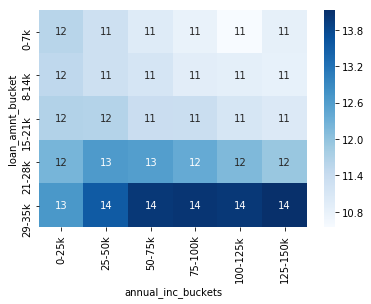

In [33]:
## correlation between values

res=pd.pivot_table(data=df1,index='loan_amnt_bucket',columns='annual_inc_buckets',values='int_rate')
res
sns.heatmap(res,cmap='Blues',annot=True)
plt.show()
# High annual income and high loan amounnt has higher interest

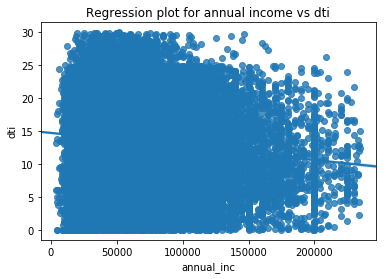

In [34]:
## correlation between dti and annual income
df1['annual_inc'].corr(df['dti'])
sns.regplot(data=df1,x='annual_inc',y='dti')
plt.title('Regression plot for annual income vs dti')
plt.show()
## annual income has negative correlation with dti, i.e if annual income is low, dti is high
## Dti here is the debt to income ratio.

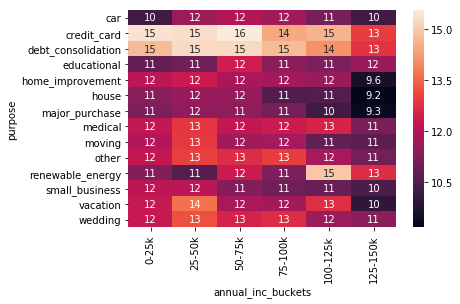

In [35]:
## how is the dti affected with loan purpose and annual income

res_1=pd.pivot_table(data=df1,index='purpose',columns='annual_inc_buckets',values='dti')
sns.heatmap(res_1,annot=True)
plt.show()

##Conclusions
##customers across the income buckets have higher dti for loan purpose debt_consolidation and credit card
#customers with lower income 0-75k who have taken loan for debt_consolidation are having higher debt to income ratio

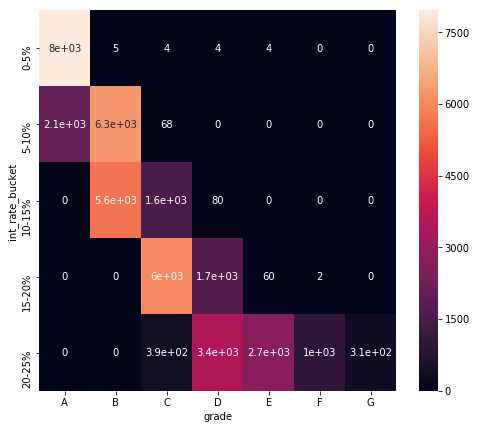

In [49]:
## relationship between grade and interest rate
res3=df1.groupby(by=['int_rate_bucket','grade'])['grade'].count().unstack().fillna(0)
plt.figure(figsize=(8,7))
sns.heatmap(res3,annot=True)
plt.show()

## grade A has low interest rate and grade G has high interest rate

C:\Users\Rakshu\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


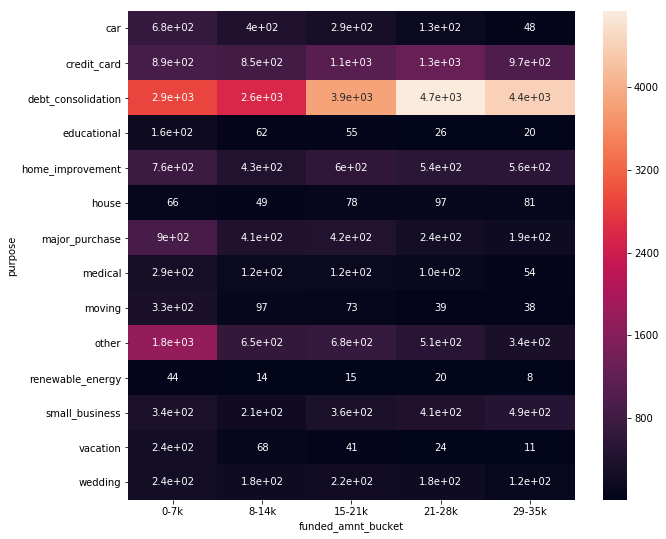

In [37]:
## loan purpose and funded amount
df1['funded_amnt_bucket']=pd.qcut(x=df1['funded_amnt'],labels=['0-7k','8-14k','15-21k','21-28k','29-35k'],q=5)

res3=df1.groupby(by=['purpose','funded_amnt_bucket'])['purpose'].count().unstack().fillna(0)
plt.figure(figsize=(10,9))
sns.heatmap(res3,annot=True)
plt.show()

## debt consolidation has the highest funded amount



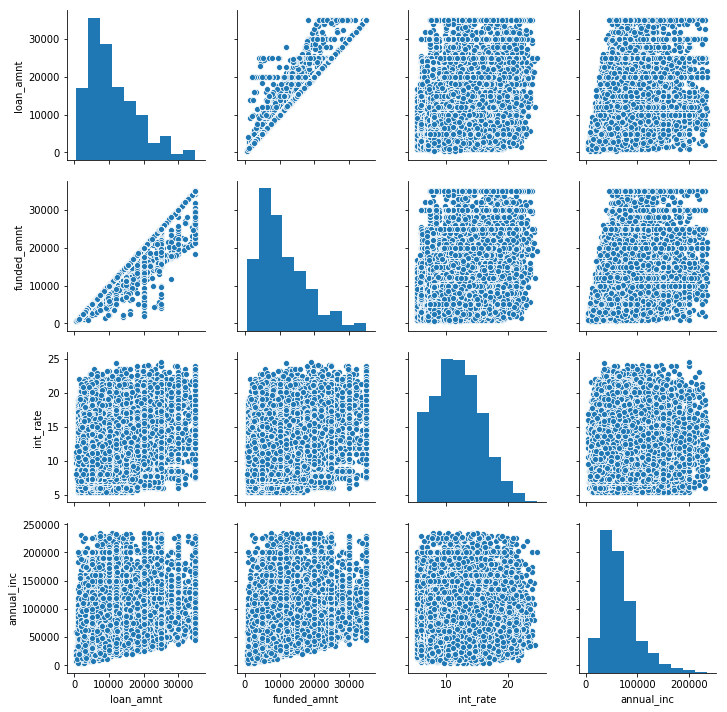

In [38]:
## Pair plot between loan amount, interest rate, funded amount, term

sns.pairplot(df1[['loan_amnt','funded_amnt','int_rate','annual_inc']])
plt.show()
##Conclusion

# loan amount and funded amount are strongly correlated
# There is some correlation between funded amount and annual income